## Astronomy 534 "Extragalactic Universe" (Winter 2025)

### Homework 4

-Vaishnav Rao

#### available: Friday March 14

#### due: Friday March 21

Please upload your solution to Canvas as Jupyter Notebook (`.pynb` format). It should contain all your code and plots. You can digitize your hand-written solution and include it as images (`.png` format) if needed. Please make sure it is clear to read.

### Criteria for success

* Solution is correct, as a functional dependence and numerical value (50% of points).

* Intermediate steps of derivations are clearly shown, blocks of code are documented with markdown cells that explain what the code does (30% of points).

* Plots are _paper quality_ (20% of points): with clear axis labels, font, legends for lines. The range of $x$ and $y$ axes should be appropriate for plotted values, without large blocks of empty space.

You may discuss how to approach the problems with other students and the instructor, but all code, derivations, and write-up must be your own.

### Learning goals and background

In this homework we calculate the expected number density of galaxies on very large cosmic scales. The distribution of matter in the universe can be approximated by a network of denser spherical *halos* (that contain galaxies within them) separated by large *voids*. [Press & Schechter 1974](https://ui.adsabs.harvard.edu/abs/1974ApJ...187..425P/abstract) postulated that if the initial density fluctuations were Gaussian random field, then the fraction of the matter condensed at present time into objects with mass above some $M$ is given by

$$ F(>M) = 1 - {\rm erf}\left(\frac{\delta_c}{\sqrt{2}\,\sigma(M)}\right) $$

where erf$(x)$ is the [error function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erfc.html), $\delta_c \approx 1.69$ is the threshold linear overdensity for collapse, and $\sigma(M)$ is the rms mass fluctuation on scale $R$ corresponding to mass $M$. For a given $M$, $R(M)$ is uniquely defined by the relation

$$ M = \frac{4\pi}{3} R^3 \bar{\rho} $$

where $\bar{\rho}$ is the average matter density of the universe now.

The rms mass fluctuation $\sigma(R(M))$ is obtained by integrating the power spectrum of cosmological fluctuations $P(k)$ over all $k$:

$$ \sigma(R)^2 = {1 \over 2\pi^2} \int_0^\infty W^2(kR) \, P(k) \, k^2 dk, 
   \quad\mathrm{where}\quad W(x) = {3 (\sin{x} - x \cos{x}) \over x^3} $$
   
The number density of dark matter halos in a large volume of the universe is obtained by differentiating $F(>M)$ with respect to $M$ and multiplying by the average number density $\bar{\rho}/M$:

$$ \frac{dn}{dM} = -\sqrt{2\over \pi} \, {\bar{\rho} \over M^2} \,
       {\delta_c \over \sigma(M)} \, \frac{d\ln{\sigma(M)}}{d\ln{M}} \,
       \exp{\left[-{\delta_c^2 \over 2\sigma^2(M)}\right]} $$

The cumulative number density of halos above a given mass $M$ is

$$ n(>M) = \int_M^\infty \frac{dn}{dM}\, dM $$
   
The cumulative mass density is

$$ \rho(>M) = \int_M^\infty \frac{dn}{dM}\, M \, dM $$

and it should agree with the theoretical expectation:

$$ \rho_{\rm th}(>M) = \bar{\rho} 
   \left[ 1 - {\rm erf}\left(\frac{\delta_c}{\sqrt{2}\,\sigma(M)}\right)\right] $$ 

### Practical Suggestions

The modification of the Press-Schechter formalism for ellipsoidal collapse is given by equation 7.67 in the MBW book.

Choose the unit for $M$ as $h^{-1} M_\odot$ and the unit for $R$ as $h^{-1} {\rm Mpc}$, and then you do not need to worry about the factor of $h$ or even its value.

Use the Planck 2018 cosmology when needed.

Use the properly normalized fluctuation power spectrum $P(k)$ from the Colossus package.

### Task

__Part 1.__ (15 points)
We will need to calculate the mass function in a range of mass $10^{9} h^{-1}\, M_\odot < M < 10^{15} h^{-1}\,M_\odot$. Integrate numerically $\sigma^2(R)$ for a grid of radii $R$ corresponding to these masses $M$. Make sure the power spectrum $P(k)$ is normalized to the values of $\sigma_8$ form the Planck 2018 results. Make a plot of $\sigma(M)$ vs. $\log_{10}{M}$ in the mass range given above. Check that the numbers are reasonable ($\sigma$ should be between 0.1 and 10).
    
__Part 2.__ (15 points)
Interpolate the array of $\sigma(M)$ vs $\ln{M}$ and differentiate it numerically to obtain 
$\frac{d\ln\sigma(M)}{d\ln{M}}$.
    
__Part 3.__ (15 points)
Calculate the cumulative $n(>M)$ and differential $\frac{dn}{d\ln{M}}$ mass functions numerically and plot both on the same log-log scale.

__Part 4.__ (15 points)
Integrate the cumulative mass density $\rho(>M)$ and compare it with the analytical expression, $\rho_{th}(>M)$ on the same plot. Do they agree to better than 1% (plot the ratio)? If they do not, check your previous integrations.

__Part 5.__ (15 points)
Repeat the mass function calculation using the ellipsoidal collapse modification, and make a new corresponding plot of $n(>M)$ and $\frac{dn}{d\ln{M}}$. Also add to this plot the stellar mass function from [Bell et al. 2003](https://ui.adsabs.harvard.edu/abs/2003ApJS..149..289B/abstract):

$$
    {dn \over dM_s} dM_s = \phi_0 \left({M_s \over M_0}\right)^{-\alpha}
        e^{-M_s/M_0} \; {dM_s \over M_0},
$$

with $\phi_0 = 4\times 10^{-3}$ Mpc$^{-3}$, $\alpha = 1.1$, $M_0 = 7\times 10^{10}\, M_\odot$, and its cumulative version $n(>M_s)$. To put the halo and stellar masses on the same graph, adopt $M_s = f_b M$, with $f_b \equiv \Omega_{b0}/\Omega_{m0}$.

__Part 6.__ (10 points)
Comment on the similarities and differences between the distributions of halos and galaxies.

__Part 7.__ (15 points)
Using the abundance matching method, $n(>M) = n(>M_s)$, calculate the stellar mass of a galaxy associated with halo of mass $M$ (that is, not assuming $M_s = f_b M$). Make a plot the ratio $M_s/M$ vs. $M$.

## Part 1

In [1]:
from headers import *

In [2]:
# Planck 2018 cosmological paremeters
h100 = 0.677
Om0 = 0.1424/h100**2
Ob0 = 0.0224/h100**2
ns = 0.967
sigma8 = 0.81
zeq = 3387.
keq = 0.01034/h100 # in h Mpc^-1
Tcmb0 = 2.726 # in K

In [3]:
from colossus.cosmology import power_spectrum
from scipy.integrate import quad
from scipy.interpolate import interp1d

H = 100 * h100 * (u.km / u.s) / (u.Mpc)  # in km/s/Mpc
rho_m = 3. * Om0 * H**2 / (8. * np.pi * const.G)

# Define R(M)
def R(M):
    # M in Msun/h
    M = M * u.Msun
    # R in Mpc/h
    return (((3. * M) / (4. * np.pi * rho_m))**(1./3.)).to(u.Mpc).value

# Define k values
k = np.logspace(-5, 4, 901)  # in comoving h/Mpc
Tk = power_spectrum.modelEisenstein98(k, h100, Om0, Ob0, Tcmb0)

# Interpolation of Tk
Tk_int = interp1d(k, Tk, kind='cubic')

# Define sig2 function
def sig2(logk, R):
    ak = 10.**logk
    T = Tk_int(ak)
    Pk = ak**ns * T**2
    x = ak * R
    W2 = (3. * (np.sin(x) - x * np.cos(x)) / x**3)**2
    f = W2 / (2. * np.pi**2) * Pk * ak**2
    return f * ak * np.log(10.)

# Compute Power Spectrum Normalization
def compute_A():
    return sigma8**2 / quad(sig2, -5., 4., args=(8.,))[0]

A = compute_A()

# Define mass and radius grid
M_grid = np.logspace(9, 15, 100)  # in h^-1 Msun
R_grid = R(M_grid)

# Function to integrate sig2 for each R
def sigma_R(R):
    return np.sqrt(A * quad(sig2, -5., 4., args=(R,))[0])

# Vectorize sigma_R
sigma = np.vectorize(sigma_R)(R_grid)

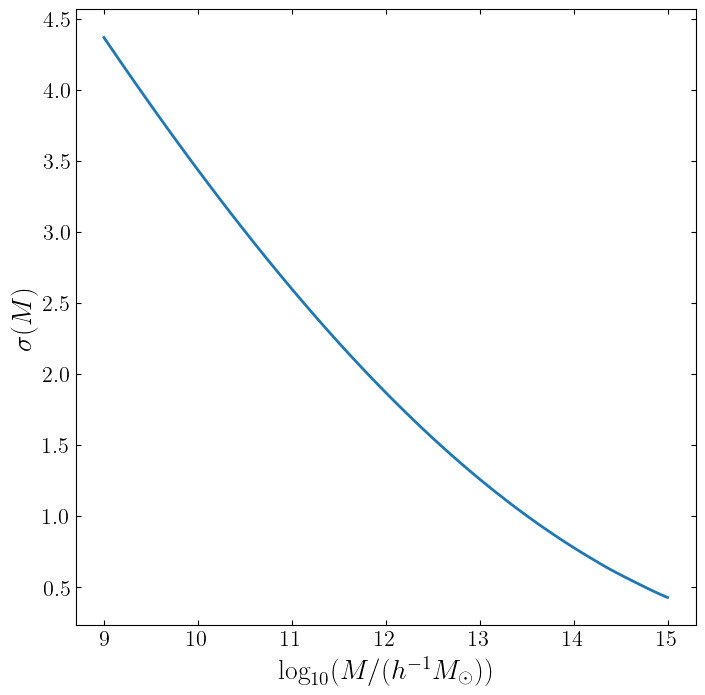

In [4]:
log10M = np.log10(M_grid)
#Plot:
fig, ax = plt.subplots()
ax.plot(log10M, sigma, lw = 2)
ax.set_xlabel(r'$\log_{10}(M/(h^{-1}M_\odot))$')
ax.set_ylabel(r'$\sigma(M)$')
plt.show()

## Part 2

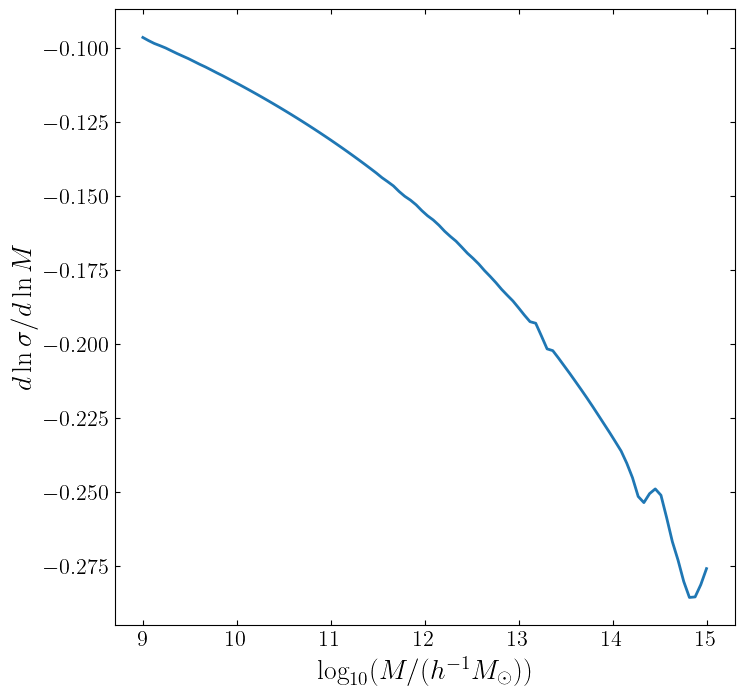

In [5]:
#Interpolate sigma(M) vs ln M
sigma_int = interp1d(log10M, sigma, kind='cubic')  #sigma_int now takes ln(M) as input

#Differentiate sigma(M) to get dln(sigma)/dln(M)
dlnsigma_dlnM_vals = np.gradient(np.log10(sigma_int(log10M)), log10M, edge_order=2) #dlnsigma_dlnM now takes log10(M) as input

dlnsigma_dlnM = interp1d(log10M, dlnsigma_dlnM_vals, kind='cubic', fill_value="extrapolate")

#Plot:
fig, ax = plt.subplots()
ax.plot(log10M, dlnsigma_dlnM(log10M), lw = 2)
ax.set_ylabel(r'$d\ln\sigma/d\ln M$')
ax.set_xlabel(r'$\log_{10}(M/(h^{-1}M_\odot))$')
plt.show()

## Part 3

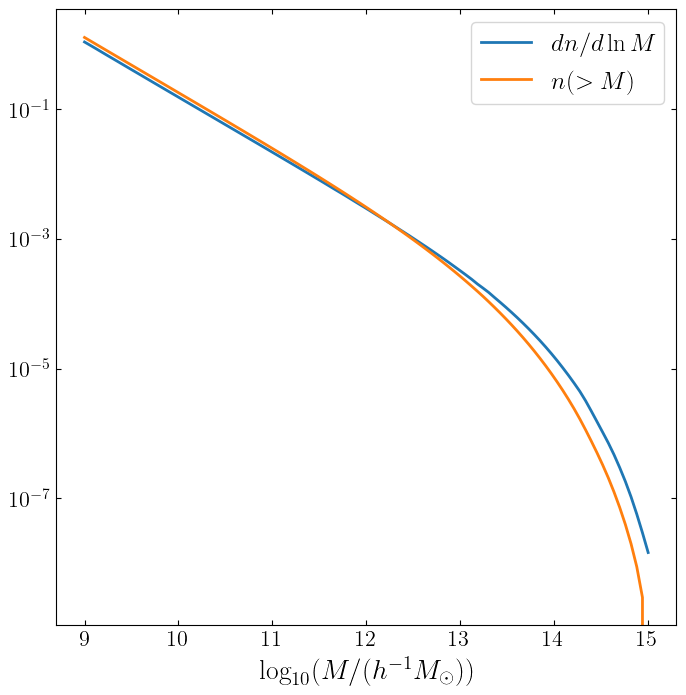

In [6]:
delta_c = 1.69

rho_m_val = rho_m.to(u.Msun / u.Mpc**3).value

# Compute dn/dM
def dn_dM(M):
    return -np.sqrt(2./np.pi) * (rho_m_val/M**2) * (delta_c/sigma_int(np.log10(M)))* (dlnsigma_dlnM(np.log10(M)))  * np.exp(-delta_c**2/(2.*sigma_int(np.log10(M))**2))

def dn_dlnM(M):
    return M * dn_dM(M)

def cumm_n_M(M):
    if M<10**10:
        return quad(dn_dM, M, 1e14)[0]
    else:
        return quad(dn_dM, M, 1e15)[0]

dn_dlnM_grid = dn_dlnM(M_grid)
n_gt_M = np.vectorize(cumm_n_M)(M_grid)

#Plot dn_dM and n(>M) on the same log-log plot
fig, ax = plt.subplots()
ax.plot(log10M, dn_dlnM_grid, lw = 2, label = r'$dn/d\ln M$')
ax.plot(log10M, n_gt_M, lw = 2, label = r'$n(>M)$')
ax.set_xlabel(r'$\log_{10}(M/(h^{-1}M_\odot))$')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend()

## Part 4:

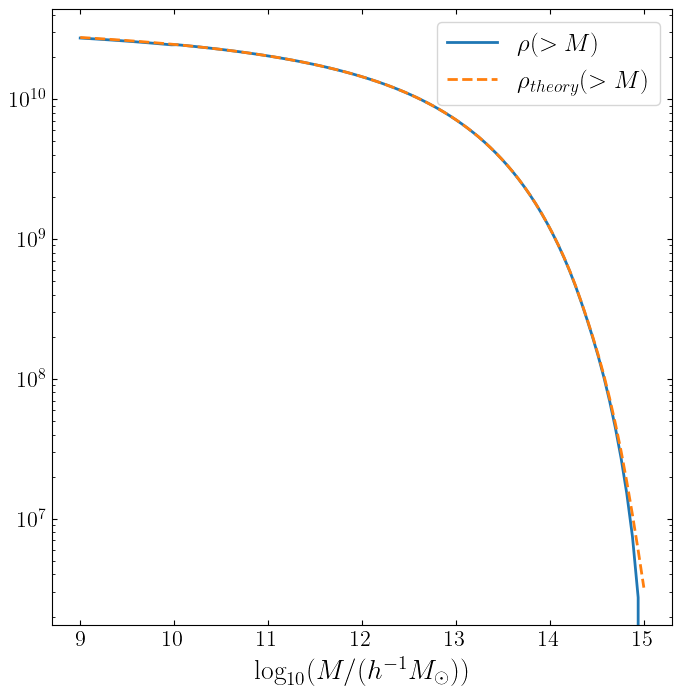

In [7]:
import math

#Density of halos with mass >M
def cumm_rho_M(M):
    if M<10**10:
        return quad(dn_dlnM, M, 10**14.4)[0]
    else:
        return quad(dn_dlnM, M, 10**15)[0]
    
#Theoretical density of halos with mass >M
#rho_gt_M_theory = rho_m_val*(1-erfc(delta_c/(np.sqrt(2)*sigma_int(log10M))))
rho_gt_M_theory = np.zeros(len(log10M))
for i in range(len(log10M)):
    rho_gt_M_theory[i] = rho_m_val*(1- math.erf(1.69/(np.sqrt(2)*sigma_int(log10M[i]))))

rho_gt_M = np.vectorize(cumm_rho_M)(M_grid)

#Plot:
fig, ax = plt.subplots()
ax.plot(log10M, rho_gt_M, lw = 2, label = r'$\rho(>M)$')
ax.plot(log10M, rho_gt_M_theory, lw = 2, label = r'$\rho_{theory}(>M)$', linestyle = '--')
ax.set_xlabel(r'$\log_{10}(M/(h^{-1}M_\odot))$')
ax.set_yscale('log')
ax.legend()

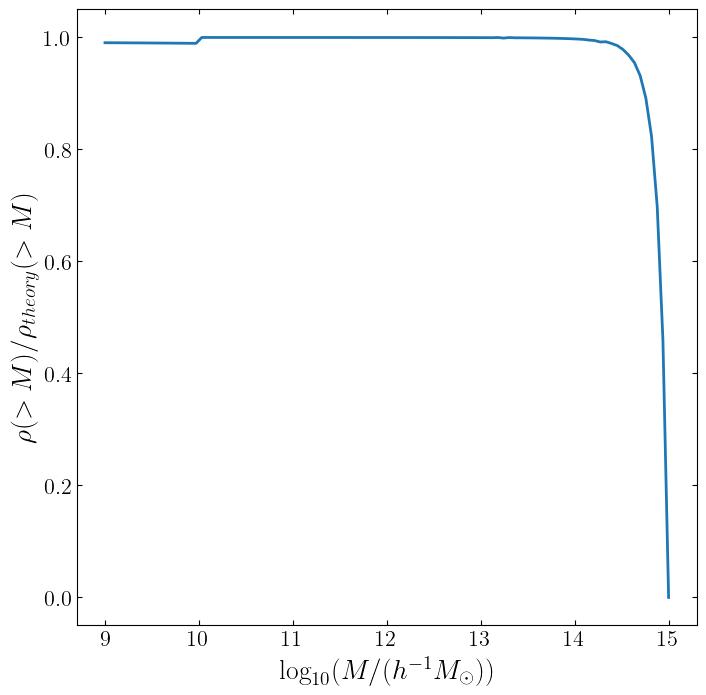

In [8]:
#Plot the ratio:
fig, ax = plt.subplots()
ax.plot(log10M, rho_gt_M/rho_gt_M_theory, lw = 2)
ax.set_xlabel(r'$\log_{10}(M/(h^{-1}M_\odot))$')
ax.set_ylabel(r'$\rho(>M)/\rho_{theory}(>M)$')
plt.show()

They agree to better than 1% until $M \approx 10^{14.7} h^{-1} M_\odot$. After that it falls off becuase the limits of integration is $10^{15}$ and not infinity.

## Part 5: Ellipsoidal Collapse

In [9]:
def dn_dMEC(M):
    nu = delta_c/sigma_int(np.log10(M))
    nu_bar = 0.84*nu
    A = 0.322
    q = 0.3
    return -np.sqrt(2./np.pi) * (rho_m_val/M**2) * nu_bar * np.exp(-nu_bar**2/2) * A *(1 + (1/nu_bar**(2*q)))* (dlnsigma_dlnM(np.log10(M)))

def dn_dlnMEC(M):
    return M * dn_dMEC(M)

def cumm_n_MEC(M):
    if M<10**10:
        return quad(dn_dMEC, M, 1e14)[0]
    else:
        return quad(dn_dMEC, M, 1e15)[0]
    
#Stellar mass distribution:
f= Ob0/Om0
def dn_dMs(Ms):
    phi_0 = 4e-3
    M0 = 7e10 #Msun
    a = 1.1
    return phi_0 * (Ms/M0)**(-a) * np.exp(-Ms/M0) / M0

def dn_dlnMs(Ms):
    return Ms * dn_dMs(Ms)

def cumm_n_Ms(Ms):
    return quad(dn_dMs, Ms, f*10**15)[0]

dn_dlnMEC_grid = dn_dlnMEC(M_grid)
n_gt_MEC = np.vectorize(cumm_n_MEC)(M_grid)

#Stellar mass distribution:

dn_dlnMs_grid = dn_dlnMs(f*M_grid)
n_gt_Ms = np.vectorize(cumm_n_Ms)(f*M_grid)



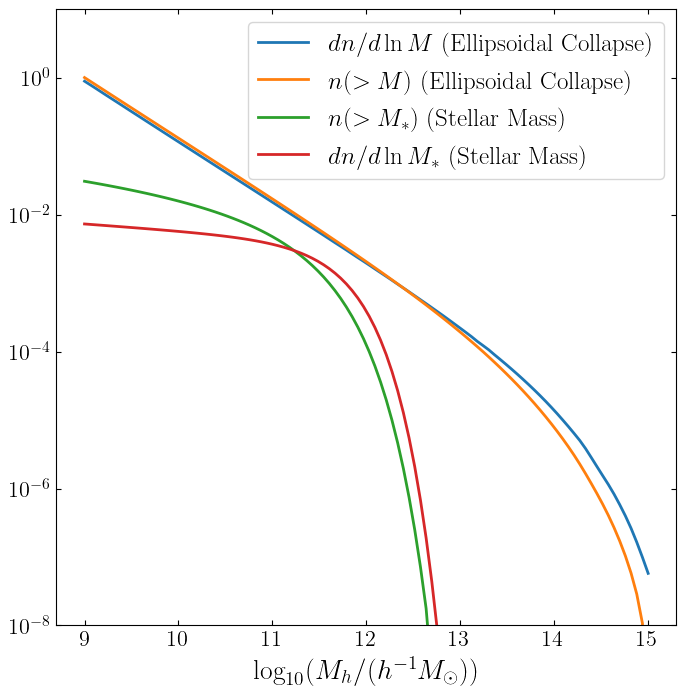

In [10]:
#Plot dn_dM and n(>M) on the same log-log plot
fig, ax = plt.subplots()
ax.plot(log10M, dn_dlnMEC_grid, lw = 2, label = r'$dn/d\ln M$ (Ellipsoidal Collapse)')
ax.plot(log10M, n_gt_MEC, lw = 2, label = r'$n(>M)$ (Ellipsoidal Collapse)')
ax.plot(log10M, n_gt_Ms, lw = 2, label = r'$n(>M_*)$ (Stellar Mass)')
ax.plot(log10M, dn_dlnMs_grid, lw = 2, label = r'$dn/d\ln M_*$ (Stellar Mass)')
ax.set_xlabel(r'$\log_{10}(M_h/(h^{-1}M_\odot))$')
ax.set_yscale('log')
ax.set_ylim(1e-8, 10)
#ax.set_xscale('log')
ax.legend()

## Part 6:
Similarities:
The overall shape of the distribution functions for DM halos and galaxies is similar. They both have a power law shape with a sharp cutoff at the high mass end.

Differences:
There are fewer low mass galaxies in low mass halos and fewer high mass galaxies in high mass halos than the case if every halo had a correspondingly massive galaxy. Also, the distribution of galaxies is systematically lower because the conversion efficiency of baryons into stars is not 100%. If the curves touched at any point, it would imply that for that mass and greater, all the baryons turned into stars and galaxies.

## Part 7: Abundance Matching

In [11]:
#Interpolate n_gt_Ms and n_gt_MEC
idx= np.where(n_gt_Ms > 1e-8)[0]
#Function to output stellar mass for a given n_gt_Ms
fn_gt_Ms = interp1d(n_gt_Ms[idx], np.log10(f*M_grid)[idx], kind='cubic', fill_value="extrapolate")

#Finer grid for Ms:
n_gt_Ms_fine = np.logspace(-10, -1, 1000)
Ms_fine = 10**fn_gt_Ms(n_gt_Ms_fine)

#Choose n_gt_MS_EC< 10**-1
idx_h = np.where(n_gt_MEC <= 1e-1)[0]
Mh_AM = M_grid[idx_h]

#Abundance matched stellar halo masses:
Ms_AM = 10**fn_gt_Ms(n_gt_MEC[idx_h])

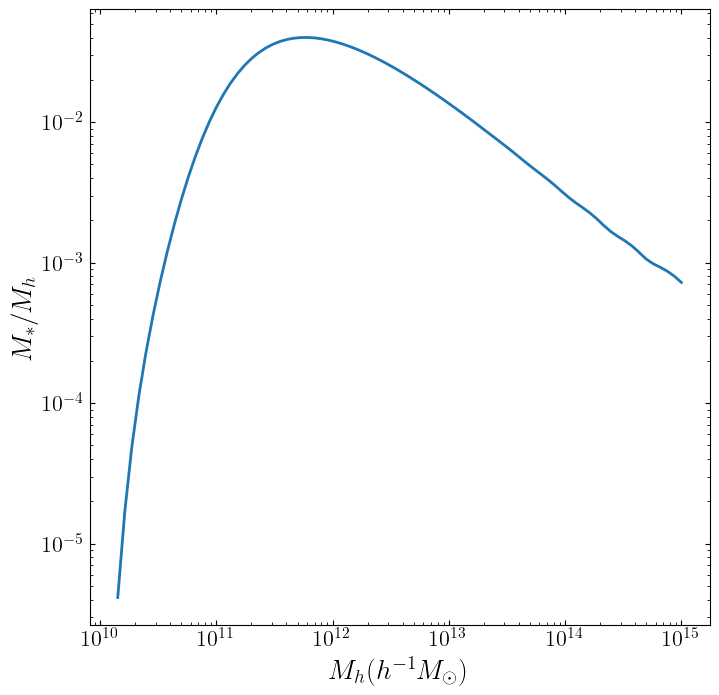

In [12]:
#Plot Ms_grid/Mh_AM vs Mh_AM:
fig, ax = plt.subplots()
ax.plot(Mh_AM, Ms_AM/Mh_AM, lw = 2)
#ax.plot(Ms_fine, n_gt_Ms_fine, lw = 2, label = r'$n(>M_*)$')
ax.set_xlabel(r'$M_h (h^{-1}M_\odot)$')
ax.set_ylabel(r'$M_*/M_h$')
ax.set_xscale('log')
ax.set_yscale('log')